In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_mldata

In [2]:
mnist_data = fetch_mldata("MNIST original")

C:\Users\Paul\AppData\Local\conda\conda\envs\handson-ml\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Paul\AppData\Local\conda\conda\envs\handson-ml\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
X, y = mnist_data["data"], mnist_data["target"]

In [4]:
X.shape, y.shape

((70000, 784), (70000,))

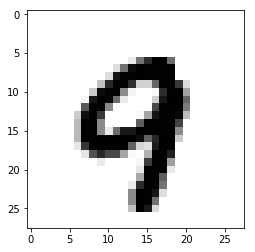

In [5]:
plt.imshow(X[55666].reshape(28,28), cmap=plt.get_cmap("binary"))

In [6]:
X_train, X_test = X[:60000], X[60000]
y_train, y_test = y[:60000], y[60000]

In [7]:
shuffle_index = np.random.permutation(len(X_train))
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [8]:
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [9]:
from sklearn.linear_model import SGDClassifier

In [10]:
model = SGDClassifier(random_state=42)
model.fit(X_train, y_train_5)

C:\Users\Paul\AppData\Local\conda\conda\envs\handson-ml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
model.predict(X_train[12000:12001])

array([False])

In [12]:
from sklearn.model_selection import cross_val_predict

In [13]:
y_train_pr = cross_val_predict(model, X_train, y_train_5, cv=5)

C:\Users\Paul\AppData\Local\conda\conda\envs\handson-ml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Paul\AppData\Local\conda\conda\envs\handson-ml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Paul\AppData\Local\conda\conda\envs\handson-ml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameter

In [14]:
np.sum(y_train_pr == y_train_5)/len(y_train_5)

0.9531666666666667

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
cm = confusion_matrix(y_train_5, y_train_pr)

In [17]:
cm

array([[52562,  2017],
       [  793,  4628]], dtype=int64)

In [18]:
from sklearn.metrics import precision_score, recall_score

In [19]:
precision = precision_score(y_train_5, y_train_pr)
recall = recall_score(y_train_5, y_train_pr)
precision, recall

(0.6964635063957864, 0.8537170263788969)

In [20]:
from sklearn.metrics import f1_score

In [21]:
f1 = f1_score(y_train_5, y_train_pr)

In [22]:
f1

0.7671142052047075

In [23]:
y_train_scores = cross_val_predict(model, X_train, y_train_5, cv=5, method="decision_function")

C:\Users\Paul\AppData\Local\conda\conda\envs\handson-ml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Paul\AppData\Local\conda\conda\envs\handson-ml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Paul\AppData\Local\conda\conda\envs\handson-ml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameter

In [24]:
y_train_scores

array([-595348.66752151, -245145.218473  , -110189.49343421, ...,
       -466859.61510551, -474283.4752904 , -322752.21439847])

(array([1.1000e+01, 7.5000e+01, 2.6600e+02, 1.0620e+03, 6.4330e+03,
        2.8141e+04, 1.9707e+04, 3.7730e+03, 5.1500e+02, 1.7000e+01]),
 array([-2288686.40285406, -1946690.24519367, -1604694.08753328,
        -1262697.92987289,  -920701.7722125 ,  -578705.61455211,
         -236709.45689171,   105286.70076868,   447282.85842907,
          789279.01608946,  1131275.17374985]),
 <a list of 10 Patch objects>)

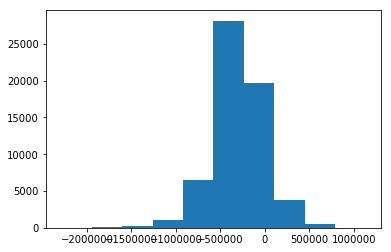

In [25]:
plt.hist(y_train_scores)

In [26]:
from sklearn.metrics import precision_recall_curve

In [27]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_train_scores)

In [28]:
thresholds.shape, precisions.shape

((59869,), (59870,))

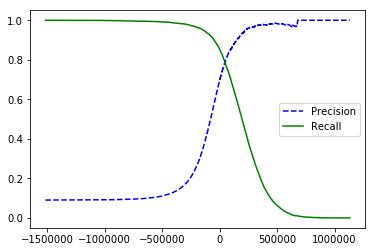

In [29]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.legend()

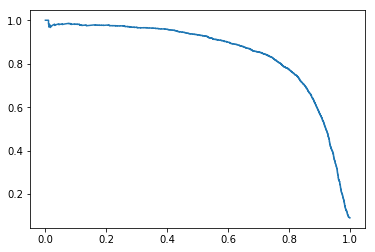

In [30]:
plt.plot(recalls, precisions)

In [31]:
from sklearn.metrics import roc_curve

In [32]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_train_scores)

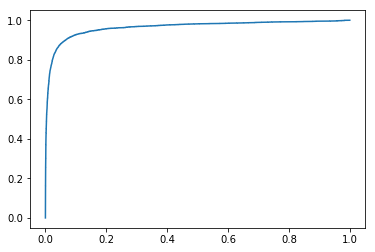

In [33]:
plt.plot(fpr, tpr)

In [35]:
from sklearn.metrics import roc_auc_score

In [36]:
roc_auc_score(y_train_5, y_train_scores)

0.9638985351807938

In [37]:
from sklearn.ensemble import RandomForestClassifier 

In [38]:
forest_clf = RandomForestClassifier(random_state=42)

In [41]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=5, method="predict_proba")

In [42]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

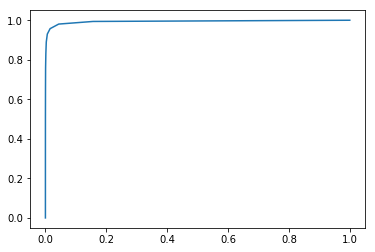

In [43]:
plt.plot(fpr_forest, tpr_forest)

In [44]:
roc_auc_score(y_train_5,y_scores_forest)

0.9937187255552649